In [1]:
import eli5
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path
from XPER.viz.Visualisation import visualizationClass as viz

from src.explanation.performance.xper import xper_values, xper_contribution, absolute_contribution
from src.explanation.performance.permutation_importance import pi
from src.modeling.create_data_split import split_data
from src.utils.models_pkl import load_pickle

from config.config_modeling import CAT_COLS, RANDOM_STATE

# Initializing all the necessary variables

In [2]:
OUT_PATH = Path("../../data") / "data_plain.csv"
MODEL_PATH = Path("../../models") / "XGB.pkl"

In [3]:
df = pd.read_csv(OUT_PATH)

In [4]:
model = load_pickle(MODEL_PATH)

In [5]:
data = split_data(cols=CAT_COLS, df=df, random_state=RANDOM_STATE)

In [6]:
X_train, y_train, X_test, y_test = (
    data["train"][0],
    data["train"][1],
    data["test"][0],
    data["test"][1],
)

# XPER Values

In [7]:
# Get the perfomance metric as well as the XPER values for the model's performance for train data
PM_test, XPER_values_test = xper_values(X_train, y_train, X_test, y_test, model)

Performing Computation:   0%|          | 0/1 [00:00<?, ?it/s]

1000


Performing Computation: 100%|██████████| 1/1 [20:05<00:00, 1205.78s/it]


In [8]:
# Print the performance metrics
print("Performance Metrics: ", PM_test)

Performance Metrics:  0.861


In [9]:
# Feature contribution to AUC using XPER for test data
final_selection_values, final_selection_labels = xper_contribution(XPER_values_test, X_test)

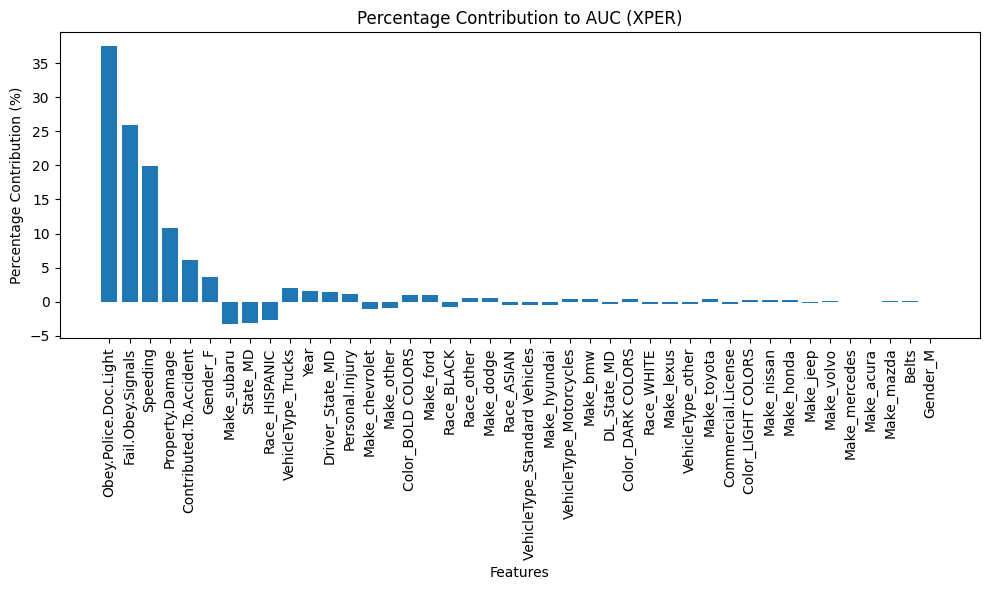

In [10]:
# Plot the bar chart for test data
plt.figure(figsize=(10, 6))
plt.bar(range(len(X_test.columns)), final_selection_values, tick_label=final_selection_labels)
plt.title("Percentage Contribution to AUC (XPER)")
plt.xlabel("Features")
plt.ylabel("Percentage Contribution (%)")
plt.xticks(rotation=90)
plt.show()

In [11]:
# absolute contribution of features to AUC for test data
contribution_dict_test = absolute_contribution(
    PM_test, final_selection_values, final_selection_labels
)

In [12]:
# Get the perfomance metric as well as the XPER values for the model's performance for train data
PM_train, XPER_values_train = xper_values(X_train, y_train, X_train, y_train, model)

Performing Computation:   0%|          | 0/1 [00:00<?, ?it/s]

1000


Performing Computation: 100%|██████████| 1/1 [20:14<00:00, 1214.04s/it]


In [13]:
# Print the performance metrics
print("Performance Metrics: ", PM_train)

Performance Metrics:  0.907


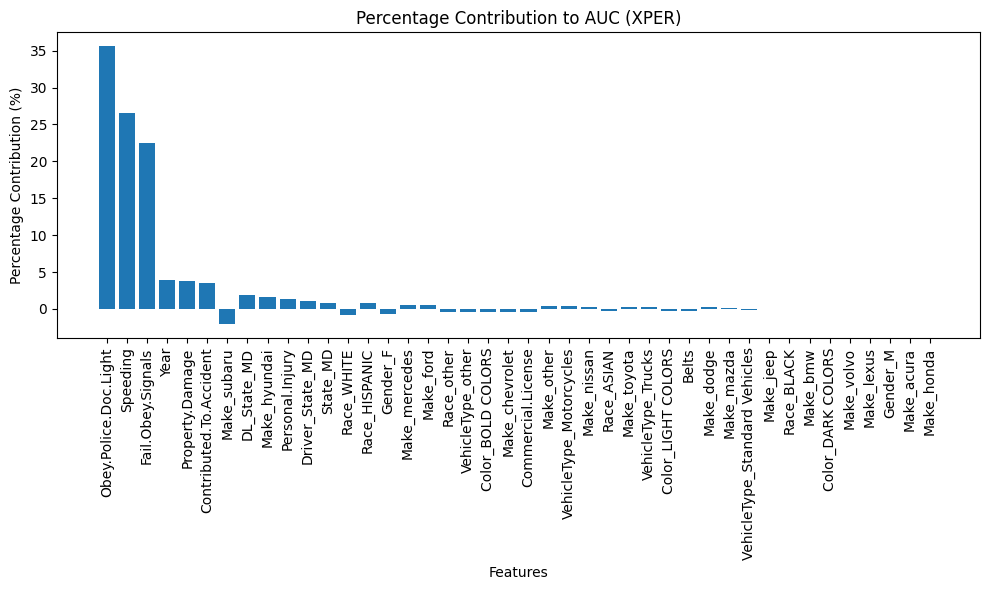

In [14]:
# Feature contribution to AUC using XPER for train data
final_selection_values, final_selection_labels = xper_contribution(XPER_values_train, X_train)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(X_train.columns)), final_selection_values, tick_label=final_selection_labels)
plt.title("Percentage Contribution to AUC (XPER)")
plt.xlabel("Features")
plt.ylabel("Percentage Contribution (%)")
plt.xticks(rotation=90)
plt.show()

In [15]:
# absolute contribution of features to AUC for train data
contribution_dict_train = absolute_contribution(
    PM_train, final_selection_values, final_selection_labels
)

In [16]:
difference_performance = {
    key: contribution_dict_train[key] - contribution_dict_test[key]
    for key in contribution_dict_train
}

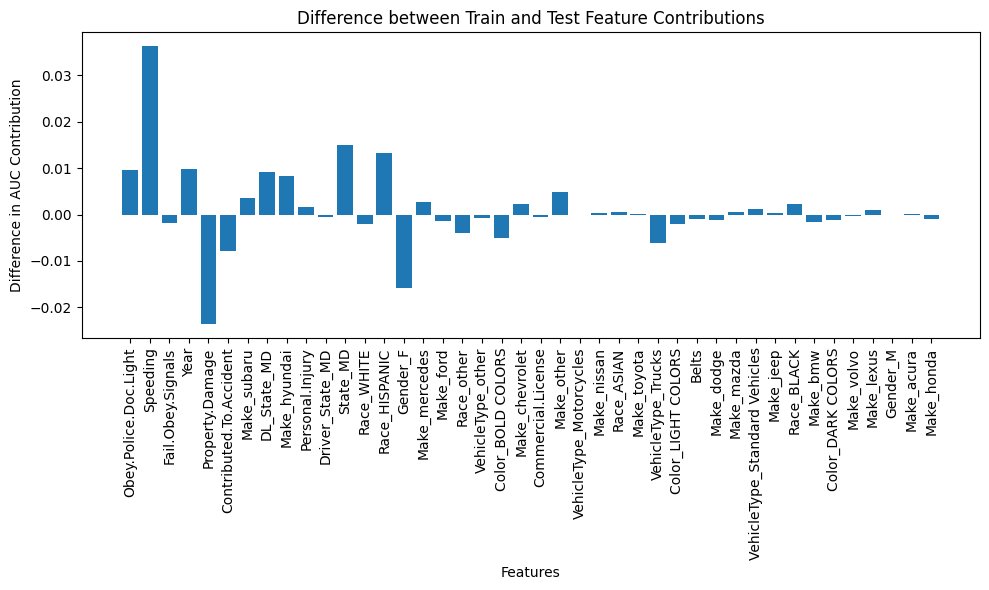

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(
    range(len(X_train.columns)),
    difference_performance.values(),
    tick_label=list(difference_performance.keys()),
)
plt.title("Difference between Train and Test Feature Contributions")
plt.xlabel("Features")
plt.ylabel("Difference in AUC Contribution")
plt.xticks(rotation=90)
plt.show()

# Permutation Importance

In [18]:
sorted_features, sorted_contributions, perm_importance = pi(X_train, X_test, y_test, model)

# Display feature importances using weights
weights = eli5.show_weights(perm_importance, feature_names=list(X_train.columns))

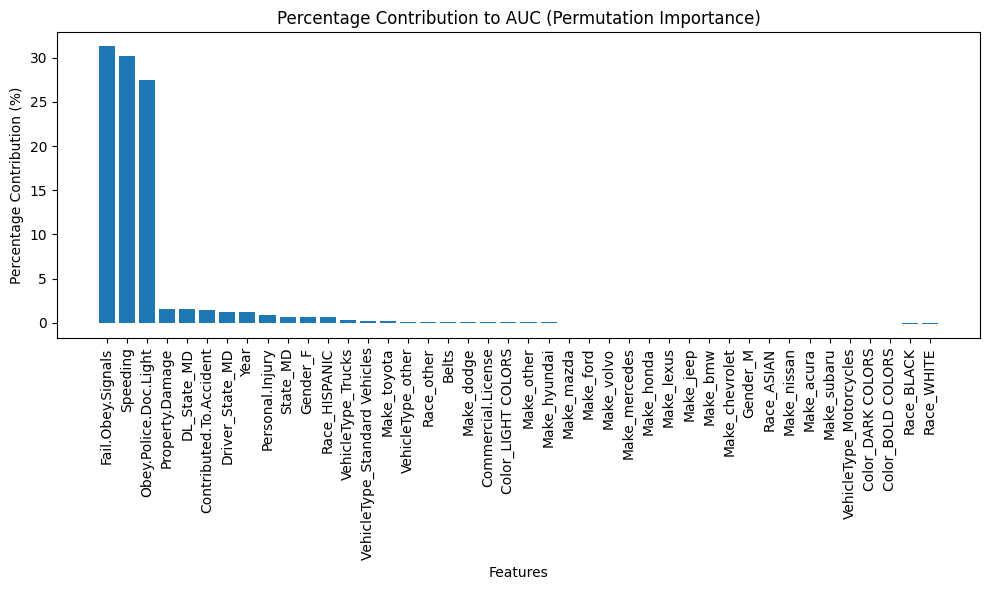

In [19]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_contributions, tick_label=sorted_features)
plt.title("Percentage Contribution to AUC (Permutation Importance)")
plt.xlabel("Features")
plt.ylabel("Percentage Contribution (%)")
plt.xticks(rotation=90)
plt.show()